  animal name  hair  feathers  eggs  milk  airborne  aquatic  predator  \
0    aardvark     1         0     0     1         0        0         1   
1    antelope     1         0     0     1         0        0         0   
2        bass     0         0     1     0         0        1         1   
3        bear     1         0     0     1         0        0         1   
4        boar     1         0     0     1         0        0         1   

   toothed  backbone  breathes  venomous  fins  legs  tail  domestic  catsize  \
0        1         1         1         0     0     4     0         0        1   
1        1         1         1         0     0     4     1         0        1   
2        1         1         0         0     1     0     1         0        0   
3        1         1         1         0     0     4     0         0        1   
4        1         1         1         0     0     4     1         0        1   

   type  
0     1  
1     1  
2     4  
3     1  
4     1  
        

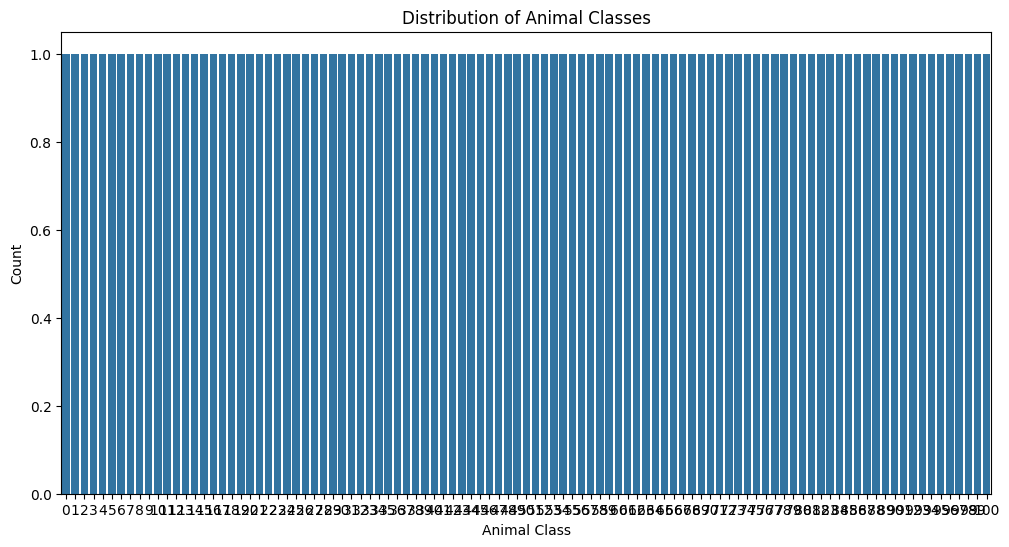

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings


warnings.filterwarnings('ignore')
# Load the dataset
data = pd.read_csv(r"D:\DS\KNN\Zoo.csv")

# Display the first few rows of the dataset
print(data.head())
# Summary statistics of the dataset
print(data.describe())

# Check for missing values
print(data.isnull().sum())

# Visualize the distribution of animal types
plt.figure(figsize=(12, 6))
sns.countplot(data['type'])
plt.title('Distribution of Animal Classes')
plt.xlabel('Animal Class')
plt.ylabel('Count')
plt.show()

In [26]:
# Check for missing values
missing_values = data.isnull().sum()
print("Missing values:\n", missing_values)

# Since there are no missing values, we don't need to handle them
# Check for outliers (for simplicity, we'll skip detailed outlier analysis here)


Missing values:
 animal name    0
hair           0
feathers       0
eggs           0
milk           0
airborne       0
aquatic        0
predator       0
toothed        0
backbone       0
breathes       0
venomous       0
fins           0
legs           0
tail           0
domestic       0
catsize        0
type           0
dtype: int64


In [27]:
from sklearn.model_selection import train_test_split

# Features and labels
X = data.drop(columns=['animal name', 'type'])
y = data['type']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f'Training set size: {X_train.shape}')
print(f'Testing set size: {X_test.shape}')


Training set size: (80, 16)
Testing set size: (21, 16)


In [28]:
from sklearn.neighbors import KNeighborsClassifier

# Create the KNN classifier
knn = KNeighborsClassifier(n_neighbors=5)  # Choosing K=5 for now

# Fit the model on the training data
knn.fit(X_train, y_train)


KNeighborsClassifier()

In [29]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# Predict on the testing set
y_pred = knn.predict(X_test)

# Calculate performance metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1-Score: {f1:.2f}')
print('\nClassification Report:\n', classification_report(y_test, y_pred))


Accuracy: 0.90
Precision: 0.90
Recall: 0.90
F1-Score: 0.90

Classification Report:
               precision    recall  f1-score   support

           1       1.00      0.92      0.96        12
           2       1.00      1.00      1.00         2
           3       0.00      0.00      0.00         1
           4       0.50      1.00      0.67         2
           6       1.00      1.00      1.00         3
           7       1.00      1.00      1.00         1

    accuracy                           0.90        21
   macro avg       0.75      0.82      0.77        21
weighted avg       0.90      0.90      0.90        21



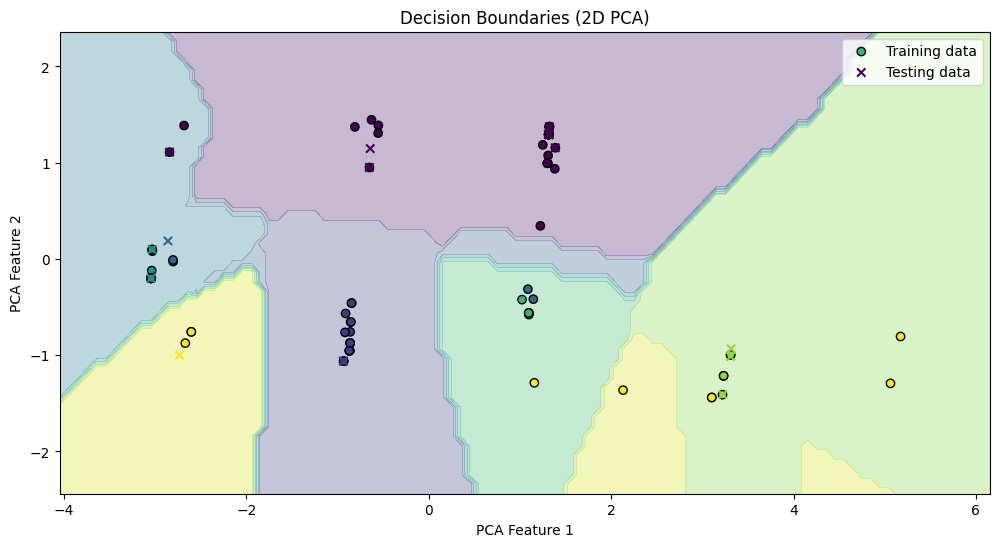

In [30]:
from sklearn.decomposition import PCA
import numpy as np

# Reduce dimensions to 2D using PCA
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Train KNN on the reduced data
knn_pca = KNeighborsClassifier(n_neighbors=5)
knn_pca.fit(X_train_pca, y_train)

# Create mesh grid
x_min, x_max = X_train_pca[:, 0].min() - 1, X_train_pca[:, 0].max() + 1
y_min, y_max = X_train_pca[:, 1].min() - 1, X_train_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))

# Predict on the mesh grid
Z = knn_pca.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(12, 6))
plt.contourf(xx, yy, Z, alpha=0.3)
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train, edgecolors='k', marker='o', label='Training data')
plt.scatter(X_test_pca[:, 0], X_test_pca[:, 1], c=y_test, edgecolors='k', marker='x', label='Testing data')
plt.title('Decision Boundaries (2D PCA)')
plt.xlabel('PCA Feature 1')
plt.ylabel('PCA Feature 2')
plt.legend()
plt.show()


1. What are the key hyperparameters in KNN?

    **a. Number of Neighbors (K):** The number of nearest neighbors to consider for classification or regression.
   
    **b. Distance Metric:** The metric used to measure the distance between data points (e.g., Euclidean, Manhattan).
   
    **c. Weights:** Determines whether all neighbors are weighted equally or closer neighbors have more influence (e.g., uniform, distance).

2. What distance metrics can be used in KNN?

    **a. Euclidean Distance:** The straight-line distance between two points.

    **b. Manhattan Distance:** The sum of the absolute differences of the coordinates.

    **c.Minkowski Distance:** A generalization of Euclidean and Manhattan distances.

    **d. Hamming Distance:** Used for categorical variables, measuring the number of differing attributes.